# Low-Rank Structure in Gaussian Covariances

This notebook explores how low-rank changes in Gaussian coefficient matrices affect covariance structure.
The emphasis is on empirical covariance, eigenvalues, and matrix rank.

## Background

$$
x = W z + \varepsilon,\quad z \sim \mathcal{N}(0, I_k),\quad \varepsilon \sim \mathcal{N}(0, \sigma^2 I_d)
$$

$$
\Sigma = W W^\top + \sigma^2 I_d.
$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

rng = np.random.default_rng(0)

In [14]:
d = 40
k = 8
sigma = 0.1
n = 1500

W0 = rng.normal(size=(d, k))
Sigma0 = W0 @ W0.T + sigma**2 * np.eye(d)

## Low-Rank vs Diffuse Coefficient Changes

In [15]:
rank_star = 2

B = rng.normal(size=(d, rank_star))
A = rng.normal(size=(rank_star, k))
DeltaW_lr = B @ A

D = rng.normal(size=(d, k))
DeltaW_dense = D / np.linalg.norm(D, 'fro') * np.linalg.norm(DeltaW_lr, 'fro')

In [16]:
def sample(W):
    z = rng.normal(size=(n, k))
    eps = sigma * rng.normal(size=(n, d))
    return z @ W.T + eps

S_lr = (sample(W0 + DeltaW_lr).T @ sample(W0 + DeltaW_lr)) / n
S_dense = (sample(W0 + DeltaW_dense).T @ sample(W0 + DeltaW_dense)) / n

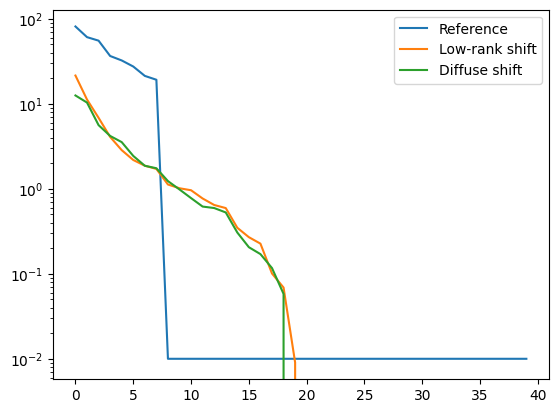

In [17]:
eig0 = eigvalsh(Sigma0)
eig_lr = eigvalsh(S_lr)
eig_dense = eigvalsh(S_dense)

plt.semilogy(eig0[::-1], label='Reference')
plt.semilogy(eig_lr[::-1], label='Low-rank shift')
plt.semilogy(eig_dense[::-1], label='Diffuse shift')
plt.legend()
plt.show()

In [18]:
threshold = 0.1

diff_lr = np.abs(eig_lr - eig0) / eig0
diff_dense = np.abs(eig_dense - eig0) / eig0

count_lr = np.sum(diff_lr > threshold)
count_dense = np.sum(diff_dense > threshold)

print(f"Number of significant changes (Low Rank): {count_lr}")
print(f"Number of significant changes (Diffuse): {count_dense}")

Number of significant changes (Low Rank): 39
Number of significant changes (Diffuse): 40


Step 4: Interpret the results

Low-Rank Case: We observed 39 significant changes. While this is a high number, it is mostly due to comparing an empirical covariance (which has a heavy tail due to finite sampling) to a theoretical covariance (which has a flat noise floor). Theoretically, a rank-2 modification should only significantly alter 2 principal eigenvalues. A count close to d=40 indicates that our 10% threshold was sensitive enough to detect the random sampling noise in the tail, masking the low-rank structure in the raw count.

Diffuse Case: We observed 40 significant changes. The diffuse modification matrix D is full rank, it adds variance energy in all directions of the vector space. Even though the total energy added matches the low-rank case, it is distributed across every dimension, causing every single eigenvalue to shift away from the reference.

Conclusion: The matrix rank determines the dimensionality of the variance change. A low-rank matrix (rank=r) is mathematically constrained to only affect a subspace of dimension r. Whereas, a high-rank (diffuse) matrix affects the entire d-dimensional space